In [1]:
import torch
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torchvision.transforms import v2

In [2]:
df = pd.read_csv('fashion-mnist-testn/fmnist_train.csv')[:-1]
test_df = pd.read_csv('fashion-mnist-testn/fmnist_test.csv')

In [3]:
train_df, val_df = train_test_split(df, test_size=0.1, stratify=df.iloc[:, 0])

In [4]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, mode):
        super().__init__()
        self.df = df
        self.mode = mode
        self.transforms = transforms.Compose([
                            transforms.ToTensor(),
                        ])

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        if self.mode == 'test':
            img = self.df.iloc[idx, :-1].values.reshape(28, 28).astype(float)
            return self.transforms(img).to(torch.float)
        else:
            img = self.df.iloc[idx, 1:-1].values.reshape(28, 28).astype(float)
            return self.transforms(img).to(torch.float), torch.tensor(self.df.iloc[idx, 0])

In [5]:
train_dataset = CustomDataset(train_df, 'train')
val_dataset = CustomDataset(val_df, 'val')

In [6]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=0)
val_dataloader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=0)

In [7]:
device = torch.device('cuda:0')

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(128, 10)
).to(device)

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=1e-3)
num_epochs = 20

In [33]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    train_epoch_losses = []
    val_epoch_losses = []
    train_epoch_accuracies = []
    val_epoch_accuracies = []

    model.train()
    print(f'Epoch: {epoch}')
    for x, y in tqdm(train_dataloader):
        x, y = x.to(device), y.to(device)
        opt.zero_grad()
        preds = model(x)
        loss = loss_fn(preds, y)

        assert not np.isnan(loss.item())
        loss.backward()
        opt.step()
        train_epoch_losses.append(loss.item())
        train_epoch_accuracies.append(accuracy_score(y.detach().cpu().numpy(), preds.argmax(dim=1).detach().cpu().numpy()))


    model.eval()
    for x, y in tqdm(val_dataloader):
        x, y = x.to(device), y.to(device)
        preds = model(x)
        loss = loss_fn(preds, y)
        val_epoch_losses.append(loss.item())
        val_epoch_accuracies.append(accuracy_score(y.detach().cpu().numpy(), preds.argmax(dim=1).detach().cpu().numpy()))

    train_losses.append(np.mean(train_epoch_losses))
    val_losses.append(np.mean(val_epoch_losses))
    train_accuracies.append(np.mean(train_epoch_accuracies))
    val_accuracies.append(np.mean(val_epoch_accuracies))

Epoch: 0


100%|██████████| 107/107 [00:00<00:00, 163.78it/s]


Epoch: 1


100%|██████████| 107/107 [00:00<00:00, 152.68it/s]


Epoch: 2


100%|██████████| 107/107 [00:00<00:00, 154.23it/s]


Epoch: 3


100%|██████████| 107/107 [00:00<00:00, 153.15it/s]


Epoch: 4


100%|██████████| 107/107 [00:00<00:00, 153.18it/s]


Epoch: 5


100%|██████████| 107/107 [00:00<00:00, 157.19it/s]


Epoch: 6


100%|██████████| 107/107 [00:00<00:00, 150.53it/s]


Epoch: 7


100%|██████████| 107/107 [00:00<00:00, 153.64it/s]


Epoch: 8


100%|██████████| 107/107 [00:00<00:00, 158.35it/s]


Epoch: 9


100%|██████████| 107/107 [00:00<00:00, 158.19it/s]


Epoch: 10


100%|██████████| 107/107 [00:00<00:00, 155.20it/s]


Epoch: 11


100%|██████████| 107/107 [00:00<00:00, 154.35it/s]


Epoch: 12


100%|██████████| 107/107 [00:00<00:00, 152.80it/s]


Epoch: 13


100%|██████████| 107/107 [00:00<00:00, 152.88it/s]


Epoch: 14


100%|██████████| 107/107 [00:00<00:00, 154.60it/s]


Epoch: 15


100%|██████████| 107/107 [00:00<00:00, 154.20it/s]


Epoch: 16


100%|██████████| 107/107 [00:00<00:00, 153.73it/s]


Epoch: 17


100%|██████████| 107/107 [00:00<00:00, 154.26it/s]


Epoch: 18


100%|██████████| 107/107 [00:00<00:00, 159.10it/s]


Epoch: 19


100%|██████████| 107/107 [00:00<00:00, 159.89it/s]


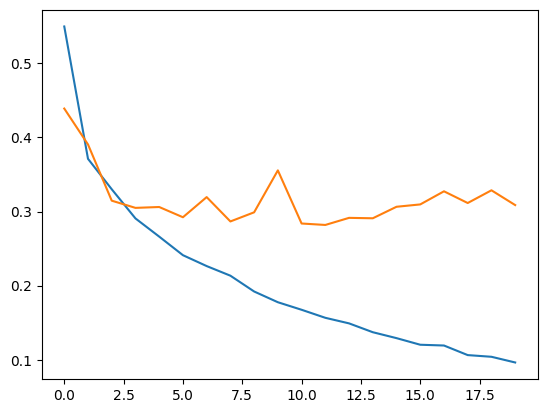

In [34]:
plt.plot(train_losses)
plt.plot(val_losses)

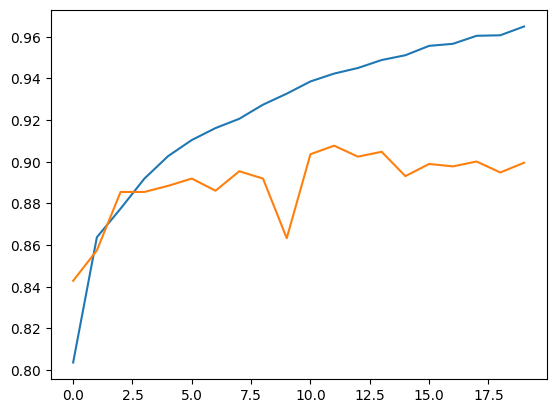

In [35]:
plt.plot(train_accuracies)
plt.plot(val_accuracies)

In [36]:
reals, predicts = [], []

model.eval()
for x, y in tqdm(val_dataloader):
    x, y = x.to(device), y.to(device)
    preds = model(x)

    reals.extend(y.detach().cpu().numpy().tolist())
    predicts.extend(preds.argmax(dim=1).detach().cpu().numpy().tolist())

100%|██████████| 107/107 [00:00<00:00, 154.77it/s]


In [37]:
accuracy_score(reals, predicts)

0.9002347417840375

In [38]:
test_dataset = CustomDataset(test_df, 'test')

In [39]:
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=0)

In [40]:
submission = pd.read_csv('fashion-mnist-testn/sample_submission.csv')

In [41]:
predicts = []

model.eval()
for x in tqdm(test_dataloader):
    x = x.to(device)
    preds = model(x)
    predicts.extend(preds.argmax(dim=1).detach().cpu().numpy().tolist())

100%|██████████| 625/625 [00:01<00:00, 482.96it/s]


In [42]:
submission['label'] = predicts

In [43]:
submission.to_csv('submission_VasilevNA_2.csv', index=False)